In [1]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import sys,os,math,pathlib
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from keras import Input
import sys,os,math,pathlib
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add

In [2]:
batch_size = 32
split_percent=0.3
rand_seed=123
shuffle_num=1000
EPOCHS=100
dir_path = 'C:/Users/jaehee/Desktop/graduation_project/voice_data_files/2021_9/same_amount_voice/orignal_bad_o(test_voice)'
model_path = 'C:/Users/jaehee/Desktop/jupyter_proj/model/09_08'
model_name='aug(bad)+origin(bad)(batch=32).h5'

In [4]:
data_dir = pathlib.Path(dir_path)
image_list = list(data_dir.glob('*/*.png'))
image_size = Image.open(image_list[0]).size
img_width=image_size[0]
img_height=image_size[1]
# test_image = Image.open(image_list[0])
# test_image
IMAGE_SHAPE = (img_height,img_width)
IMAGE_SHAPE

(200, 260)

In [5]:
test_model = load_model(model_path+"/"+model_name)
test_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 130, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 130, 64) 256         conv2d[0][0]                     
_______________________________________________________________________________________

In [6]:
classifier = tf.keras.Sequential([
    hub.KerasLayer(test_model, input_shape=IMAGE_SHAPE+(3,))
])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 7)                 23602055  
Total params: 23,602,055
Trainable params: 0
Non-trainable params: 23,602,055
_________________________________________________________________


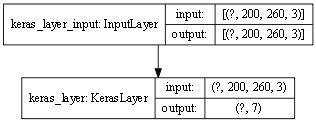

In [8]:
tf.keras.utils.plot_model(classifier, show_shapes=True, dpi=64)

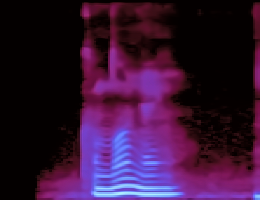

In [33]:
test_image = np.array(test_image)/255.0
test_image.shape
test_image = np.array(test_image)[:,:,:-1]
test_image

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [31]:
test_image = classifier.predict(test_image[np.newaxis, ...])

TypeError: tuple indices must be integers or slices, not tuple

In [26]:
#image_data = tf.keras.preprocessing.image_dataset_from_directory(str(data_dir))

In [15]:
image_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 7 files belonging to 7 classes.


In [16]:
class_names = image_data.class_names
num_classes = len(class_names)
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_data = image_data.cache().shuffle(shuffle_num).prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = image_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [17]:
for image_batch, labels_batch in image_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(7, 200, 260, 3)
(7,)


In [23]:
result = classifier.predict(image_batch[0][np.newaxis, ...])

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/keras_layer/functional_1/conv2d/Conv2D (defined at C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow_hub\keras_layer.py:230) ]] [Op:__inference_predict_function_13888]

Function call stack:
predict_function


In [70]:
#result = test_model.predict(test_image)
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

ValueError: in user code:

    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow_hub\keras_layer.py:238 call  *
        result = smart_cond.smart_cond(training,
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\saved_model\load.py:509 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\def_function.py:780 __call__
        result = self._call(*args, **kwds)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\def_function.py:814 _call
        results = self._stateful_fn(*args, **kwds)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\function.py:2828 __call__
        graph_function, args, kwargs = self._maybe_define_function(args, kwargs)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\function.py:3213 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\function.py:3075 _create_graph_function
        capture_by_value=self._capture_by_value),
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\framework\func_graph.py:986 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\eager\def_function.py:600 wrapped_fn
        return weak_wrapped_fn().__wrapped__(*args, **kwds)
    C:\Users\jaehee\anaconda3\envs\naerrow\lib\site-packages\tensorflow\python\saved_model\function_deserialization.py:257 restored_function_body
        "\n\n".join(signature_descriptions)))

    ValueError: Could not find matching function to call loaded from the SavedModel. Got:
      Positional arguments (3 total):
        * Tensor("inputs:0", shape=(None, 200, 260, 4), dtype=float32)
        * False
        * 0.99
      Keyword arguments: {}
    
    Expected these arguments to match one of the following 2 option(s):
    
    Option 1:
      Positional arguments (3 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (3 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


In [4]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [11]:
print(classifier)